<a href="https://colab.research.google.com/github/vicabc/cosmology/blob/main/scale_factor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Derivação do fator de escala para um universo plano**

Atualmente sabemos que o universo está em expansão. Isso implica que as distâncias entre mesmos objetos aumentam. O fator de escala é uma função adimensional do tempo e mostra quanto está aumentando conforme o tempo passa. Imagine que a distância atual entre dois pontos seja L. Em um determinado momento no futuro, a distância entre esses dois pontos será de 1,5 $\times$ L.

Dito isso, é notória a necessidade de incluir esse fator aos cálculos cosmológicos. A exemplo, podemos citar a determinação da distância própria de galáxias.

Podemos obter esse fator resolvendo a primeira equação de Friedmann escrita em termos de parâmetro de densidade $Ω_{r,0}= \frac{\rho}{\rho_c}$ onde $\rho_c$ seja a densidade crítica e está relacionada a um universo plano, ou curvatura $→$ K=0. Então temos:
$\frac{H^{2}}{H_0^{2}}= \frac{Ω_{m,0}}{a^{3}}+\frac{Ω_{r,0}}{a^{4}}+\frac{\Omega_{K,0}}{a^{2}}+Ω_{Λ,0}$. Sabendo que $\Omega_{K,0} = \frac{-K}{H_0^{2}}$ e também que $H^{2}= \frac{\dot a ^{2}}{a^{2}}$ então, substituindo obtemos:
$\frac{\dot a ^{2}}{a^{2}}=H_0^{2}[\frac{Ω_{m,0}}{a^{3}}+\frac{Ω_{r,0}}{a^{4}}+Ω_{Λ,0}]$. Isolando a derivada do fator de escala, vemos: $\dot a^{2}= H_0^{2}[\frac{Ω_{m,0}}{a}+\frac{Ω_{r,0}}{a^{2}}+Ω_{Λ,0}a^{2}]$. Podemos obter o resultado da EDO integralizando. Sendo assim, temos: $\dot a= H_0[\frac{Ω_{m,0}}{a}+\frac{Ω_{r,0}}{a^{2}}+Ω_{Λ,0}a^{2}]^{1/2}$, daí vemos que, $ \int_{0}^{t} H_0 \,dt = \int_{0}^{a} \frac{1}{{\sqrt{\frac{Ω_{m,0}}{a}+\frac{Ω_{r,0}}{a^{2}}+Ω_{Λ,0}}}} \,da $. Dito isso, iremos resolver essa integral com o auxílio dos métodos númericos a seguir.

In [16]:
import numpy as np
import scipy.integrate as integrate
import matplotlib.pyplot as plt

# constante de Hubble ((km/s) / Mpc) estimado pelos resultados final da missão Planck
H0 = 67.66

# constante de Hubble convertida para (1 / Gyr)
H0 = H0 * 0.00102271

# Parâmetro de densidade da radiação atualmente

Or0 = 0.0014936944554559174

# Parâmetro de densidade da matéria bariônica e matéria escura atualmente

Om0 = 0.30966

# Parâmetro de densidade da energia escura atualmente 

Ode0 = 0.6888463055445441

# Criamos uma variável que é descrita por espaçamento uniforme em um intervalo especificado pelo número de passos

a = np.linspace(1e-10, 3, 5000)

#Definimos a função que iremos integrar

expr = lambda a: 1 / np.sqrt(Or0/a**2 + Om0/a + Ode0*a**2)
t = np.array([integrate.quad(expr, 0, i)[0]/H0 for i in a]) #integral resolvida


Ao executar os comandos que geram as variáveis (a,t) criamos intervalos de pontos e devemos correlaciona-los de maneira que vejamos a em função de t, através de um ajuste polinomial.

In [18]:
#Ajuste polinomial

coefs = np.polyfit(t, a, 9)

# scale_factor como classe polinomial unidimensional

scale_factor = np.poly1d(coefs)

O fator de escala a calculado na célula anterior, é a seguinte expressão polinomial:

In [19]:
# imprime o polinômio scale_factor
print(scale_factor)

           9             8            7            6             5
7.209e-12 x - 1.113e-09 x + 7.29e-08 x - 2.64e-06 x + 5.776e-05 x
              4            3           2
 - 0.0007852 x + 0.006647 x - 0.03411 x + 0.1594 x + 0.02016


In [20]:
# Definimos um novo intervalo para representar o tempo, entre 0 e 30 bilhões de anos após o Big Bang.

t = np.linspace(1e-10, 30)

# Finalmente calculamos o fator de escala para cada um desses passos (tempo)

a = scale_factor(t)
a

array([0.02016347, 0.1063627 , 0.17473638, 0.23113948, 0.27977363,
       0.32356984, 0.36450272, 0.40384496, 0.4423704 , 0.48051308,
       0.51848913, 0.55638742, 0.59423463, 0.63203949, 0.66982059,
       0.70762134, 0.74551553, 0.78360618, 0.82201998, 0.86089931,
       0.90039334, 0.94064942, 0.98180565, 1.02398518, 1.06729266,
       1.11181279, 1.15761119, 1.20473699, 1.25322709, 1.30311152,
       1.35441927, 1.40718425, 1.46145071, 1.51727758, 1.57474132,
       1.63393693, 1.69497683, 1.75798759, 1.82310457, 1.89046481,
       1.9601988 , 2.03242191, 2.10722676, 2.18467801, 2.26481144,
       2.34763973, 2.4331676 , 2.5214197 , 2.61248477, 2.70658051])

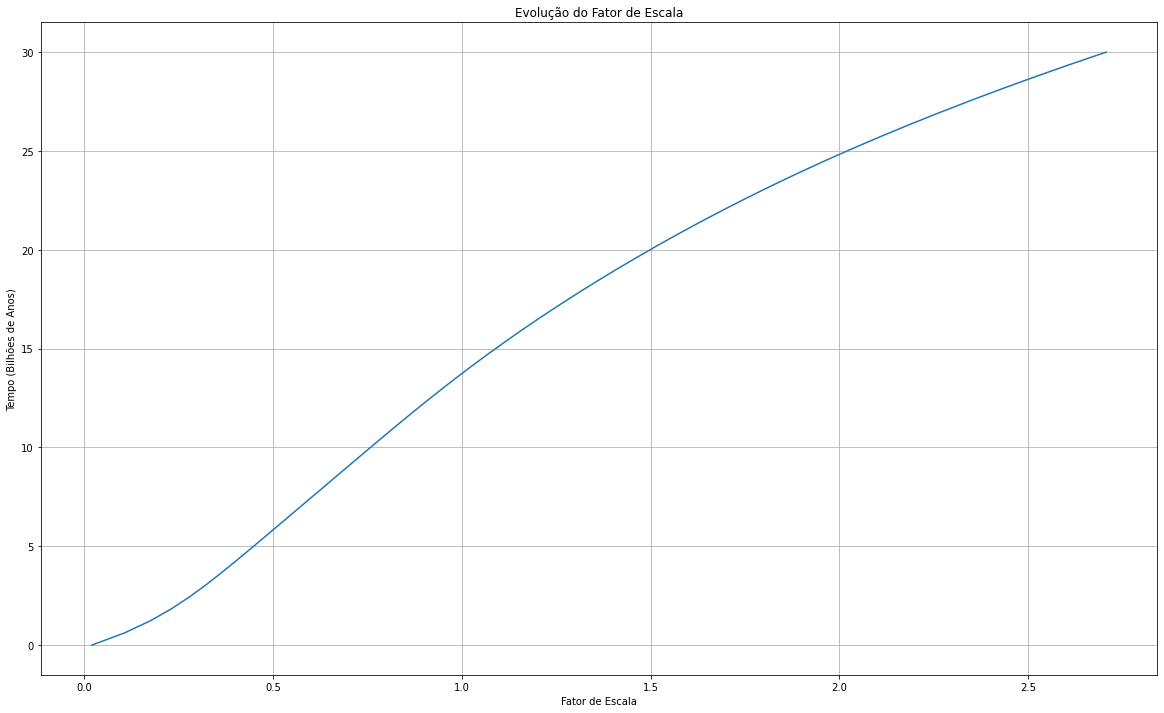

In [21]:
plt.figure(figsize=(20, 12))
plt.plot(a, t)
plt.xlabel('Fator de Escala')
plt.ylabel('Tempo (Bilhões de Anos)')
plt.title('Evolução do Fator de Escala')
plt.grid(True)
plt.show()


Podemos ver que o fator de escala sempre aumentou desde o Big Bang e continuará aumentando. Também vemos o esperado: em torno de 13 bilhões de anos, vemos o fator de escala próximo de 1.

Ref:

https://astrodatascience.net/how-to-calculate-scale-factor/
